In [2]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Use the citipy module to determine city based on latitude and longitude.
# nearest city code from https://github.com/wingchen/citipy#readme
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

630

In [7]:
range(len(cities))

range(0, 630)

In [9]:
# Import the requests library.
import requests
# Import the API key.
from config import weather_api_key

In [10]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [11]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [12]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")
# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in the list.
for i, city in enumerate(cities):
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass
# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kapaa
Processing Record 2 of Set 1 | torbay
Processing Record 3 of Set 1 | la asuncion
Processing Record 4 of Set 1 | atuona
Processing Record 5 of Set 1 | port elizabeth
Processing Record 6 of Set 1 | aflu
City not found. Skipping...
Processing Record 7 of Set 1 | karratha
Processing Record 8 of Set 1 | kloulklubed
Processing Record 9 of Set 1 | mehamn
Processing Record 10 of Set 1 | mar del plata
Processing Record 11 of Set 1 | esperance
Processing Record 12 of Set 1 | punta arenas
Processing Record 13 of Set 1 | busselton
Processing Record 14 of Set 1 | iqaluit
Processing Record 15 of Set 1 | pak chong
Processing Record 16 of Set 1 | saldanha
Processing Record 17 of Set 1 | mataura
Processing Record 18 of Set 1 | komsomolskiy
Processing Record 19 of Set 1 | palabuhanratu
City not found. Skipping...
Processing Record 20 of Set 1 | caluquembe
Processing Record 21 of Set 1 | novorzhev
Processing 

Processing Record 38 of Set 4 | alexandria
Processing Record 39 of Set 4 | pafos
Processing Record 40 of Set 4 | paraiso
Processing Record 41 of Set 4 | poum
Processing Record 42 of Set 4 | bethel
Processing Record 43 of Set 4 | hofn
Processing Record 44 of Set 4 | vaitupu
City not found. Skipping...
Processing Record 45 of Set 4 | narsaq
Processing Record 46 of Set 4 | onoda
Processing Record 47 of Set 4 | ola
Processing Record 48 of Set 4 | teknaf
Processing Record 49 of Set 4 | tanete
Processing Record 50 of Set 4 | tuktoyaktuk
Processing Record 1 of Set 5 | cayenne
Processing Record 2 of Set 5 | neuquen
Processing Record 3 of Set 5 | hay river
Processing Record 4 of Set 5 | lolua
City not found. Skipping...
Processing Record 5 of Set 5 | raga
Processing Record 6 of Set 5 | les cayes
Processing Record 7 of Set 5 | lebu
Processing Record 8 of Set 5 | husavik
Processing Record 9 of Set 5 | samusu
City not found. Skipping...
Processing Record 10 of Set 5 | conop
Processing Record 11 of

Processing Record 24 of Set 8 | inhambane
Processing Record 25 of Set 8 | tilichiki
Processing Record 26 of Set 8 | santa rosa
Processing Record 27 of Set 8 | mandalgovi
Processing Record 28 of Set 8 | schleswig
Processing Record 29 of Set 8 | arraial do cabo
Processing Record 30 of Set 8 | kristiansund
Processing Record 31 of Set 8 | sambava
Processing Record 32 of Set 8 | tambilil
Processing Record 33 of Set 8 | claresholm
Processing Record 34 of Set 8 | uchaly
Processing Record 35 of Set 8 | fauske
Processing Record 36 of Set 8 | portland
Processing Record 37 of Set 8 | isangel
Processing Record 38 of Set 8 | fort saint james
Processing Record 39 of Set 8 | sinnamary
Processing Record 40 of Set 8 | ranong
Processing Record 41 of Set 8 | ixtapa
Processing Record 42 of Set 8 | vanavara
Processing Record 43 of Set 8 | tabou
Processing Record 44 of Set 8 | gat
Processing Record 45 of Set 8 | pacifica
Processing Record 46 of Set 8 | labuhan
Processing Record 47 of Set 8 | ilo
Processing 

Processing Record 12 of Set 12 | ambulu
Processing Record 13 of Set 12 | kuah
Processing Record 14 of Set 12 | phan rang
City not found. Skipping...
Processing Record 15 of Set 12 | porto novo
Processing Record 16 of Set 12 | portobelo
Processing Record 17 of Set 12 | soe
Processing Record 18 of Set 12 | ketchenery
City not found. Skipping...
Processing Record 19 of Set 12 | raudeberg
Processing Record 20 of Set 12 | wajir
Processing Record 21 of Set 12 | bur gabo
City not found. Skipping...
Processing Record 22 of Set 12 | nizwa
Processing Record 23 of Set 12 | paluan
Processing Record 24 of Set 12 | lamar
Processing Record 25 of Set 12 | stornoway
Processing Record 26 of Set 12 | bubaque
Processing Record 27 of Set 12 | sungai besar
Processing Record 28 of Set 12 | nuevo progreso
Processing Record 29 of Set 12 | miramar
Processing Record 30 of Set 12 | vao
Processing Record 31 of Set 12 | port hedland
Processing Record 32 of Set 12 | novyy urengoy
Processing Record 33 of Set 12 | san

In [13]:
len(city_data)

570

In [14]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kapaa,22.0752,-159.3190,73.38,96,75,4.61,US,2022-02-12 18:34:35
1,Torbay,47.6666,-52.7314,44.76,82,100,14.97,CA,2022-02-12 18:30:45
2,La Asuncion,11.0333,-63.8628,83.93,61,33,17.27,VE,2022-02-12 18:34:35
3,Atuona,-9.8000,-139.0333,77.67,77,6,13.58,PF,2022-02-12 18:30:41
4,Port Elizabeth,-33.9180,25.5701,73.69,94,75,12.66,ZA,2022-02-12 18:34:36
5,Karratha,-20.7377,116.8463,85.89,66,100,2.04,AU,2022-02-12 18:34:36
6,Kloulklubed,7.0419,134.2556,81.10,76,36,23.17,PW,2022-02-12 18:34:37
7,Mehamn,71.0357,27.8492,24.75,86,75,20.71,NO,2022-02-12 18:34:37
8,Mar Del Plata,-38.0023,-57.5575,64.42,71,75,21.85,AR,2022-02-12 18:34:38
9,Esperance,-33.8667,121.9000,62.44,63,100,10.60,AU,2022-02-12 18:30:41


In [15]:
new_col_order=["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df=city_data_df[new_col_order]

In [16]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [17]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

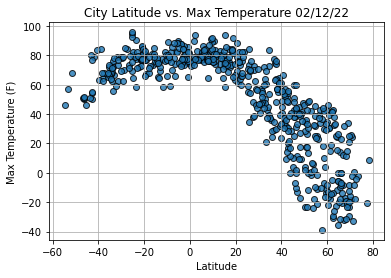

In [18]:
# Import time module
import time
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")
# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig1.png")

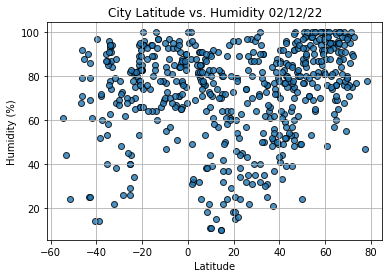

In [19]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")
# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

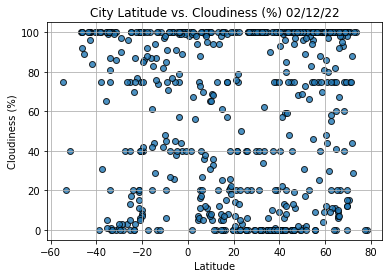

In [20]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")
# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

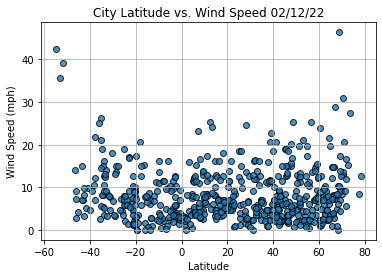

In [21]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")
# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()